In [ ]:
from zipfile import ZipFile
file_name = "UTKFace.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Đã giải nén thành công!')

Done


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split

In [ ]:
path = "/content/UTKFace"
images = []
age = []
for img in os.listdir(path):
  ages = img.split("_")[0]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  images.append(np.array(img))
  age.append(np.array(ages))

In [ ]:
age = np.array(age,dtype=np.int64)
images = np.array(images) 
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=35)

In [ ]:
age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(200,200,3)))
age_model.add(MaxPool2D(pool_size=(3,3), strides=2))

age_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPool2D(pool_size=(3,3), strides=2))
              
age_model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPool2D(pool_size=(3,3), strides=2))

age_model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
age_model.add(MaxPool2D(pool_size=(3,3), strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))
              
age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

age_model.summary()            
                           
history_age = age_model.fit(x_train_age, y_train_age, validation_data=(x_test_age, y_test_age), epochs=50)

age_model.save('age_model_50epochs.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 47, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 256)      0

In [ ]:
score = age_model.evaluate(x_test_age, y_test_age, verbose = 0) 

print('Test loss:', score[0]) 
print('Test Mean Absolute Error (mae):', score[1])

Test loss: 90.00369262695312
Test Mean Absolute Error (mae): 6.86650276184082


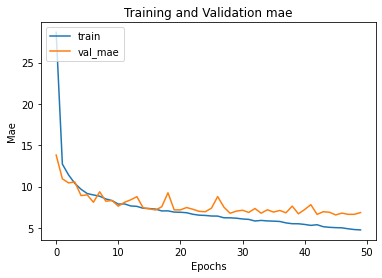

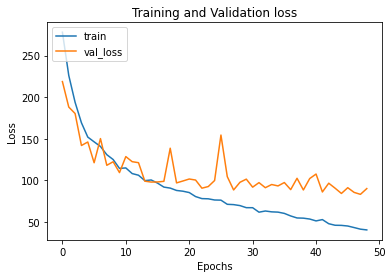

In [ ]:
history = history_age
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Training and Validation mae')
plt.ylabel('Mae')
plt.xlabel('Epochs')
plt.legend(['train','val_mae'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'][1:50])
plt.plot(history.history['val_loss'][1:50])
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','val_loss'], loc = 'upper left')
plt.show()